<a href="https://colab.research.google.com/github/Raninth/Prediction_of_Product_Sales/blob/main/Sales_predections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: (Prediction of Product Sales).
- Author: Ranin Theodory

## Load and Inspect Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Rows and columns

In [5]:
df.shape

(8523, 12)

There are 8523 rows and 12 columns

### Datatypes

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## Clean Data

 ### Duplicates data

In [7]:
df.duplicated().sum()

0

There are no duplicated data

### Missing values

In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

- Missing Values:
- There are `1463` missing values in the `Item_Weight` column. (17.16%)
  - There are `2410` missing values in the `Outlet_Size` column. (28.27%)

In [10]:
df['Item_Weight'].value_counts()


12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [11]:
df['Item_Weight']  = df['Item_Weight'].fillna(-1)
df['Item_Weight'].value_counts()


-1.000     1463
 12.150      86
 17.600      82
 13.650      77
 11.800      76
           ... 
 7.275        2
 7.685        1
 9.420        1
 6.520        1
 5.400        1
Name: Item_Weight, Length: 416, dtype: int64

In [12]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
df['Outlet_Size'].value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [14]:
df['Outlet_Size']  = df['Outlet_Size'].fillna(-1)
df['Outlet_Size'].value_counts()


Medium    2793
-1        2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [15]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

There are no missing values anymore

### Inconsistent categories





In [16]:
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [17]:
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    9

- Item_Fat_Content is inconsistent


In [18]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [19]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### summary statistics for any numerical columns

In [21]:
stats =  df.describe()


In [23]:
stats = df.describe().round(2)
result = stats.loc[['mean', 'min', 'max']]

In [ ]:
stats =  df.describe()
stats.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [25]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

### Histograms of the distributions of numerical features.

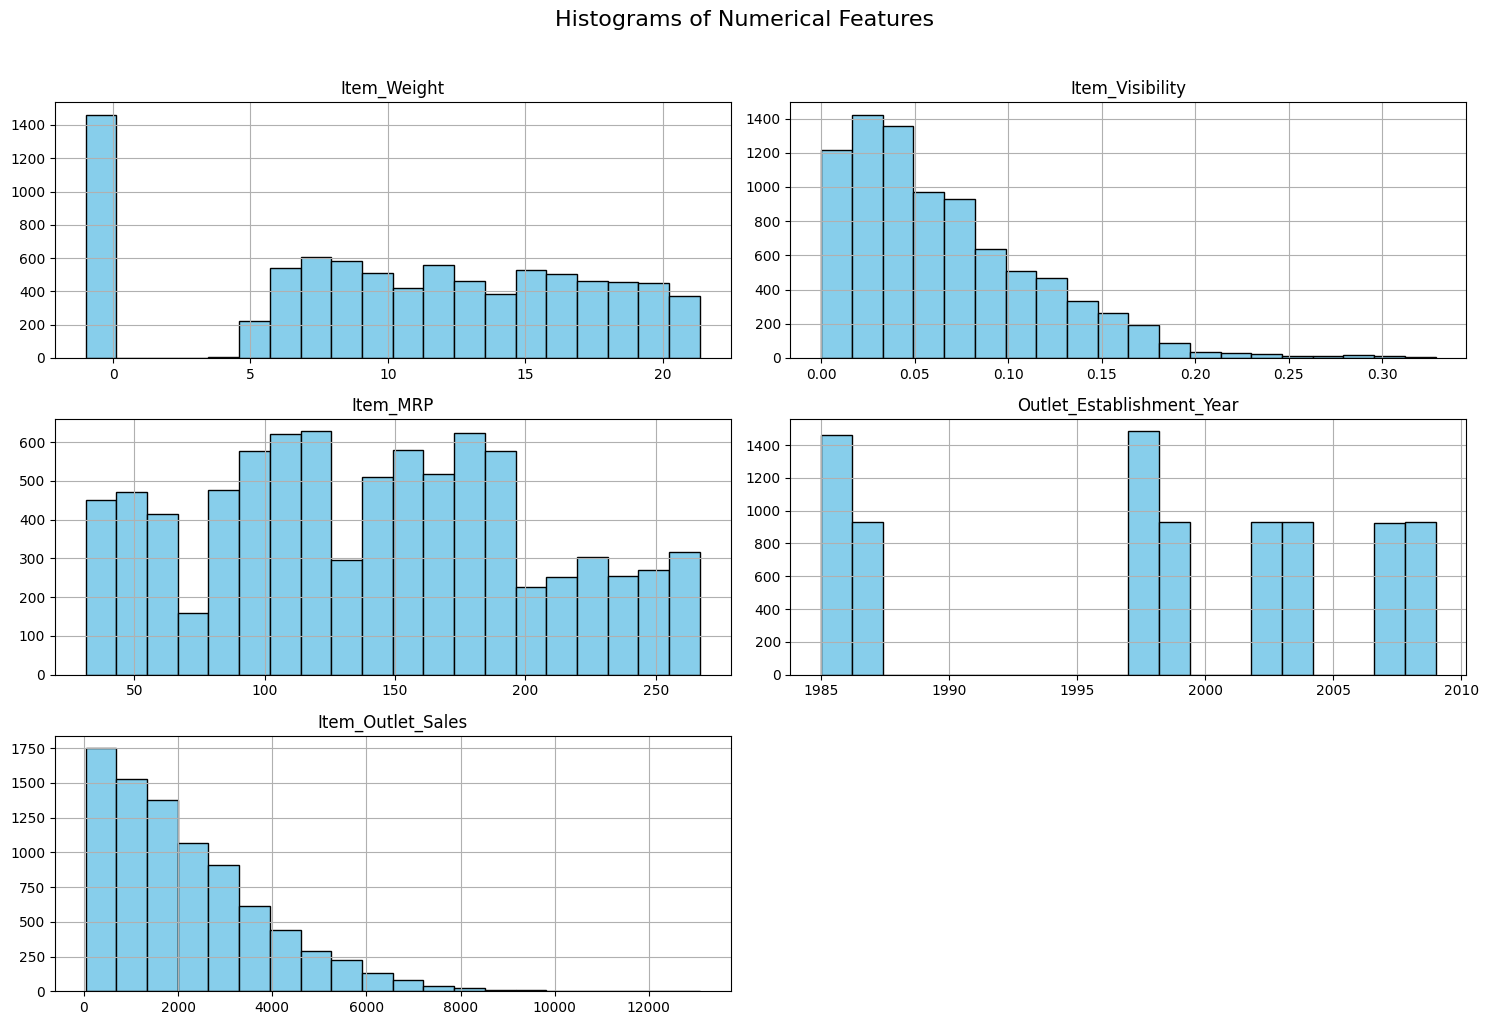

In [26]:
df[num_cols].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black');
plt.suptitle("Histograms of Numerical Features", y=1.02, fontsize=16)
plt.tight_layout()

### Boxplots of statistical summaries of numerical features.

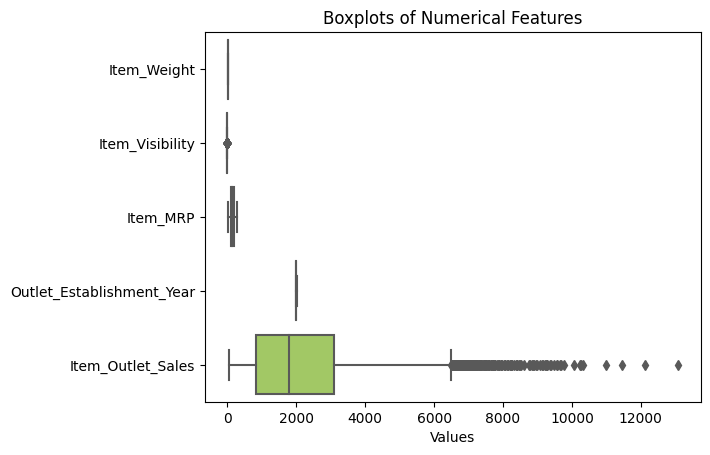

In [ ]:
ax = sns.boxplot(data=df[num_cols], orient='h', palette='Set2')
ax.set_title("Boxplots of Numerical Features")
plt.xlabel("Values");


### Countplots of the frequency of each class of categorial features.

In [ ]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

<ipython-input-87-9eb3a6310810>:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


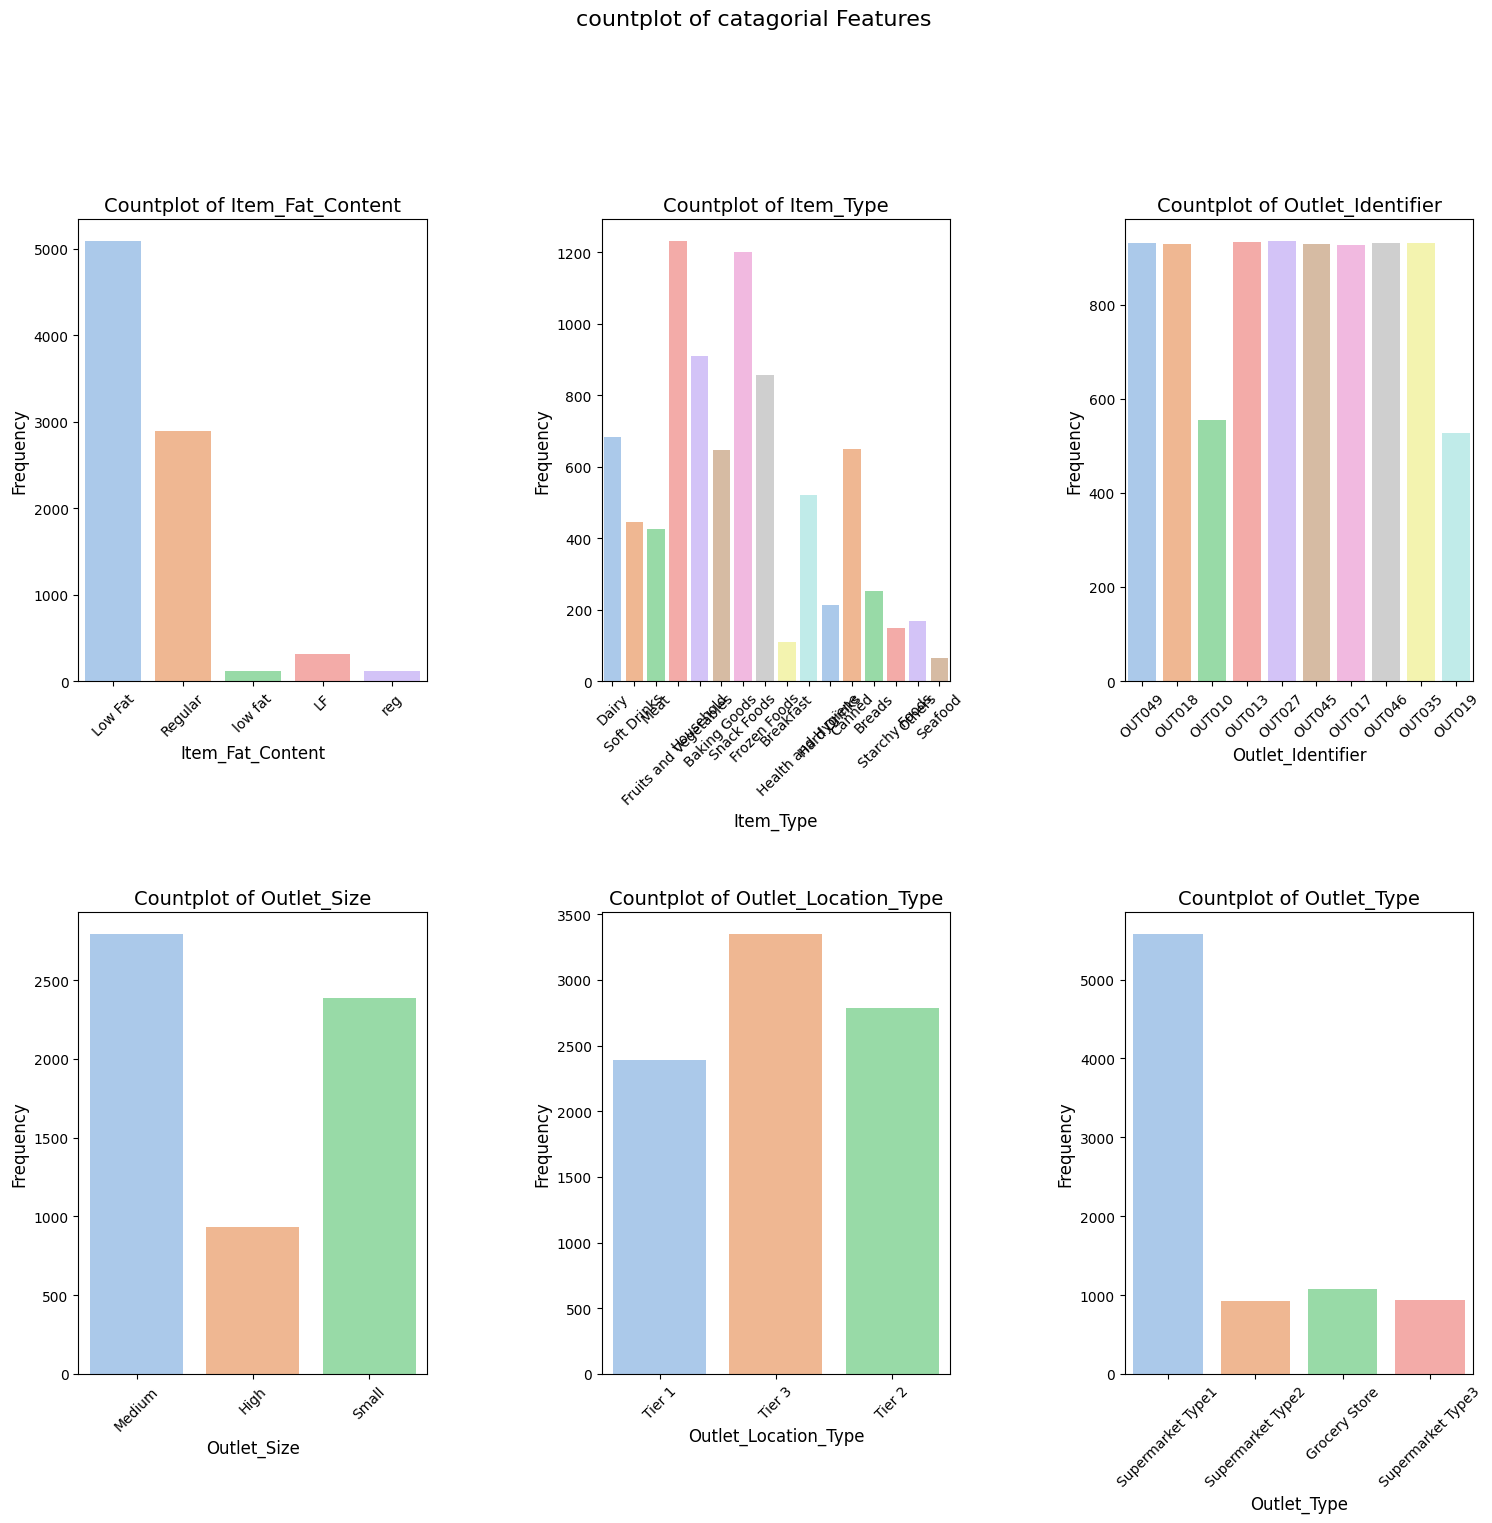

In [ ]:
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
            'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 15), gridspec_kw={'wspace':0.5})
fig.subplots_adjust(hspace=0.5)

# Flatten the axes for easier iteration
axes = axes.flatten()

# Create countplots for each categorical column
for i, cat_col in enumerate(cat_cols):

    sns.countplot(data=df, x=cat_col, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Countplot of {cat_col}', fontsize=14)
    axes[i].set_xlabel(cat_col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)
plt.suptitle("countplot of catagorial Features", y=1.02, fontsize=16)
plt.tight_layout()

# Show the plots
plt.show()

### Heatmap of the correlation between features.


In [ ]:
corr_matrix = df.corr()


<ipython-input-88-b69b4b6a6184>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


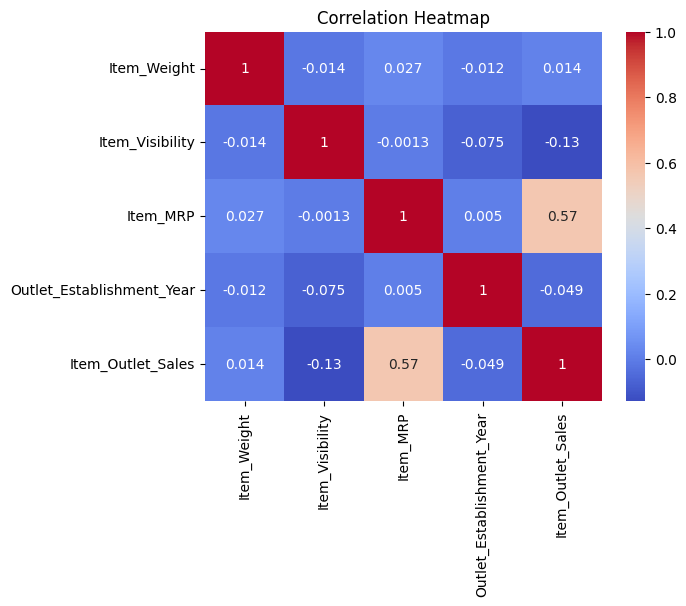

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap");


## Feature Inspection
core 4

In [27]:
df['Item_Weight']  = df['Item_Weight'].fillna(-1)
df['Item_Weight'].value_counts()
df['Item_Weight']  = df['Item_Weight'].fillna(-1)
df['Item_Weight'].value_counts()


-1.000     1463
 12.150      86
 17.600      82
 13.650      77
 11.800      76
           ... 
 7.275        2
 7.685        1
 9.420        1
 6.520        1
 5.400        1
Name: Item_Weight, Length: 416, dtype: int64

In [28]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [29]:
df['Item_Weight'].value_counts()

-1.000     1463
 12.150      86
 17.600      82
 13.650      77
 11.800      76
           ... 
 7.275        2
 7.685        1
 9.420        1
 6.520        1
 5.400        1
Name: Item_Weight, Length: 416, dtype: int64

In [30]:
#Remove the placeholders i added in week 2 and replace them with null values.
df['Item_Weight'] = df['Item_Weight'].fillna(np.nan)


In [31]:
df['Item_Weight'] = df['Item_Weight'].replace(-1, np.nan)


In [32]:
null_count = df['Item_Weight'].isnull().sum()
null_count

1463

In [33]:
df['Outlet_Size'].value_counts()


Medium    2793
-1        2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [34]:
df['Outlet_Size'] = df['Outlet_Size'].replace(-1, np.nan)


In [35]:
null_count = df['Outlet_Size'].isnull().sum()
null_count

2410

In [36]:
# checking if i have the null values back
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [37]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- Feature Inspection

In [38]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


In [39]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='rating',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

### Item_Identifier: Product ID


- Item_Identifier: Product ID

In [33]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Identifier"
df[feature].dtype


dtype('O')

In [36]:
df[feature].head()

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
Name: Item_Identifier, dtype: object

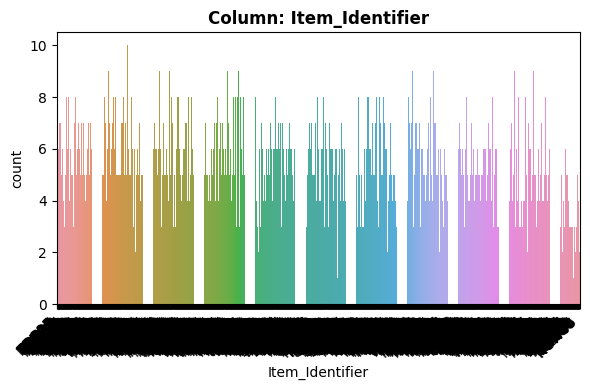

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [44]:
# run the appropriate explore function
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0.0%)

3. Is the feature constant or quasi-constant?
  - no

4. What is the cardinality? Is it high?
  - 1559 very high

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - yes because its just the name (ID number) of the product



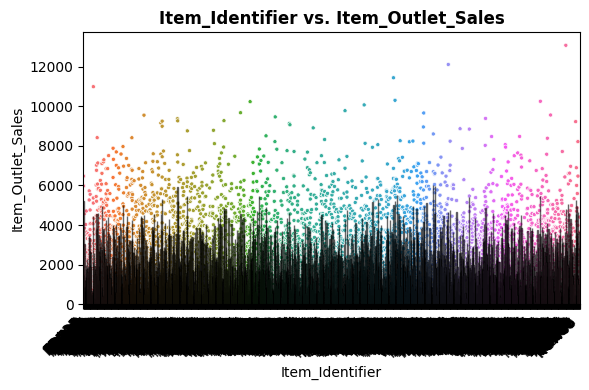

In [45]:
# Run the appropriate feature vs. target function
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `no`because it's just the id number of the products it won't affect the sale target
  - Does this feature appear to be a predictor of the target?
    - `no`
  

___

### Item_Weight

  - Item_Weight: Weight of product

  

In [41]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Weight"
df[feature].dtype


dtype('float64')

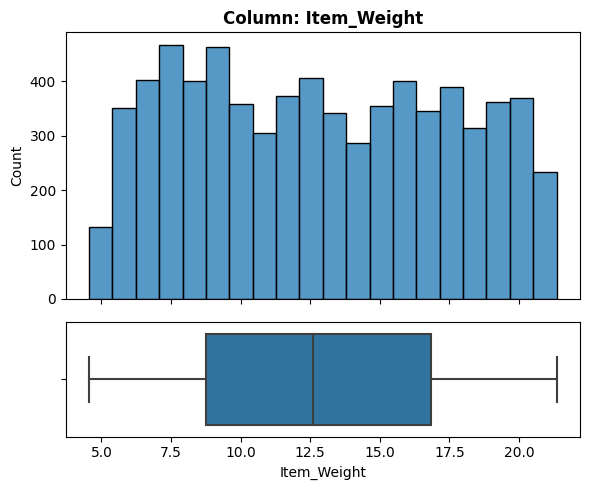

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [42]:
# run the appropriate explore function
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 (17.17%) impute with median

3. Is the feature constant or quasi-constant?
  - no

4. What is the cardinality? Is it high?
  - Not applicable (numeric)

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no



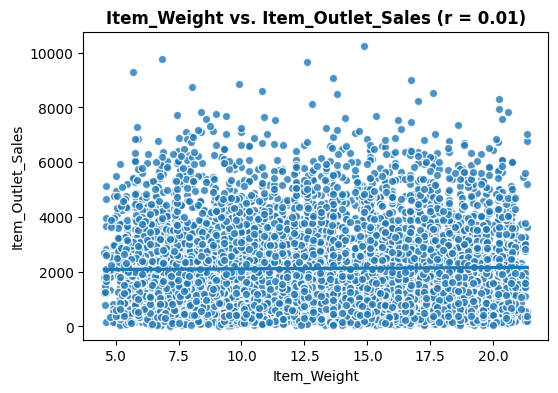

In [43]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Maybe` the weight of the product may have effect of the sale predection
  - Does this feature appear to be a predictor of the target?
    - `no` because the line is horizontal line it doesnt show any positive or negative
___

### Item_Fat_Content

- Item_Fat_Content: Whether the product is low-fat or regular


In [45]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Fat_Content"
df[feature].dtype


dtype('O')

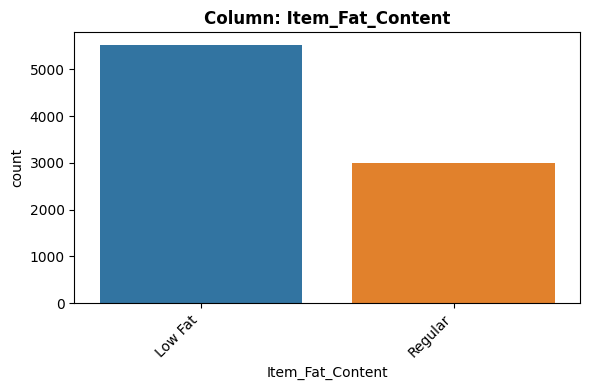

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [46]:
# run the appropriate explore function
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0.0%)

3. Is the feature constant or quasi-constant?
  - no

4. What is the cardinality? Is it high?
  - 4 it's not high

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



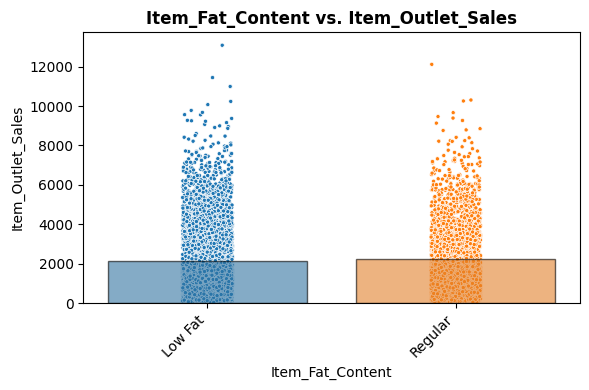

In [47]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `yes`i think people prefer some kind of fat content from another
  - Does this feature appear to be a predictor of the target?
    - `Maybe`, although there is a little diffrence between the two but it it will maybe be a predictor

___

### Item_Visibility

- Item_Visibility: The percentage of total display area of all products in a store allocated to the particular product
  

In [48]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Visibility"
df[feature].dtype


dtype('float64')

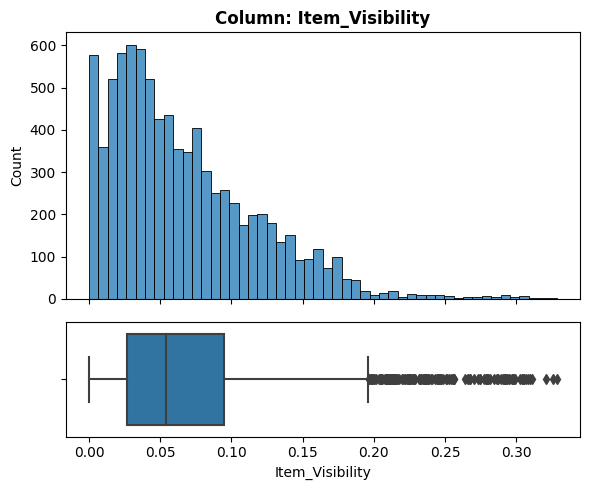

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [49]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  -  numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0.0%)

3. Is the feature constant or quasi-constant?
  - no

4. What is the cardinality? Is it high?
  - Not applicable (numeric).


5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no



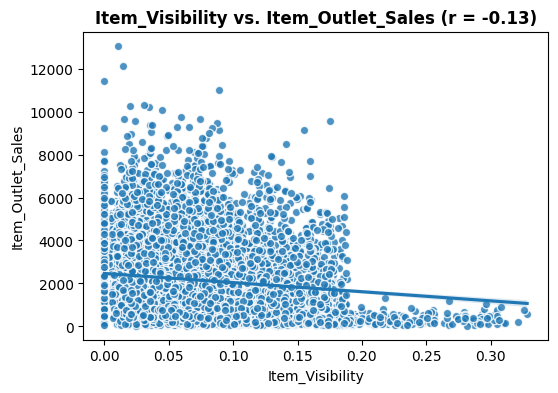

In [50]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `yes` i think it wil because the more the item is visible the more it will have sales
  - Does this feature appear to be a predictor of the target?
    - `yes`, but opposite direction than I expected!

___

### Item_Type

- Item_Type: The category to which the product belongs

In [52]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Type"
df[feature].dtype


dtype('O')

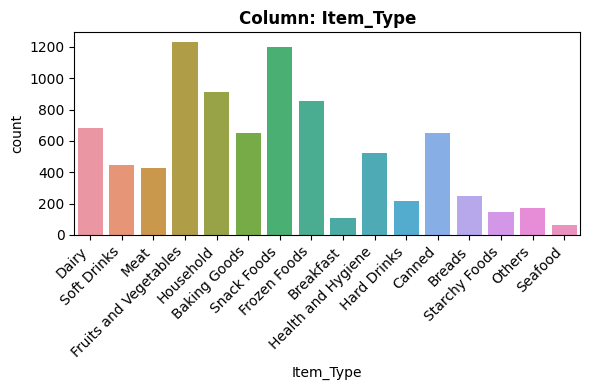

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [53]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0.0%)

3. Is the feature constant or quasi-constant?
  - no

4. What is the cardinality? Is it high?
  - yes 16 > 10

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no



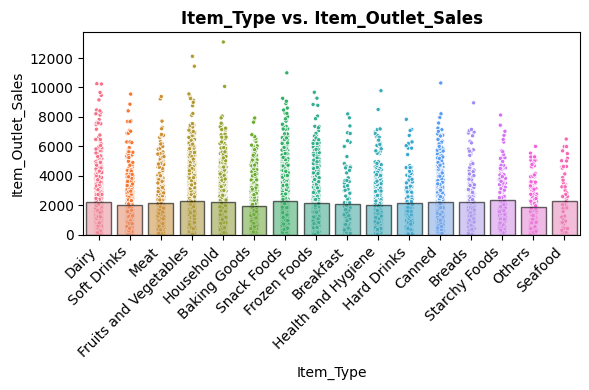

In [54]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `yes` the type of item will be a predictor because of the varaity of items
  - Does this feature appear to be a predictor of the target?
    - `yes`

___

### Item_MRP

- Item_MRP:Maximum Retail Price (list price) of the product

In [55]:
# # Confirming the dtype to select correct EDA function
feature = "Item_MRP"
df[feature].dtype


dtype('float64')

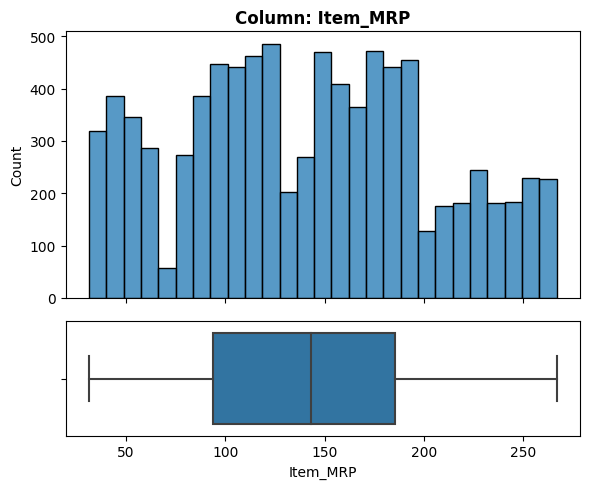

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [56]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0.0%)

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - Not applicable (numeric)

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no



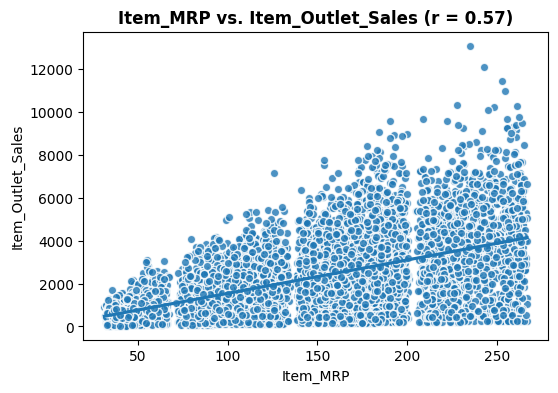

In [57]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `yes`
  - Does this feature appear to be a predictor of the target?
    - `yes`
___

### Outlet_Identifier

- Outlet_Identifier: Store ID
  

In [58]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Identifier"
df[feature].dtype


dtype('O')

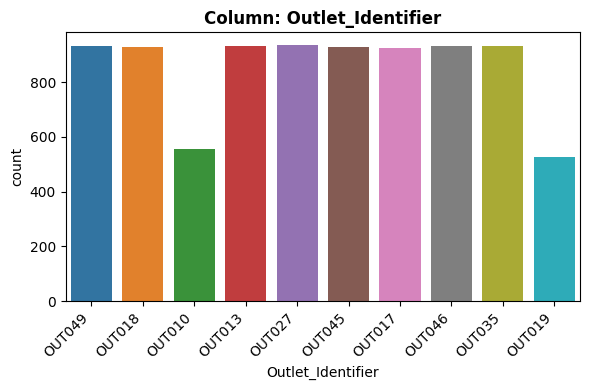

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [59]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -  0 (0.0%)

3. Is the feature constant or quasi-constant?
  - no

4. What is the cardinality? Is it high?
  - 10 is high

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - yes because the store id won't affect the target



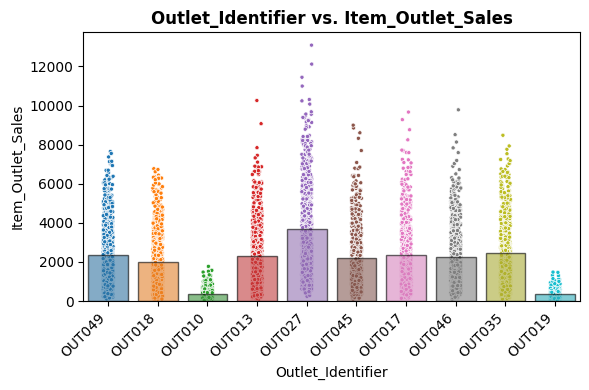

In [60]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `No` because the store id (name won't affect the target)
  - Does this feature appear to be a predictor of the target?
    - `Maybe` there is variety in the barplots

___

### Outlet_Establishment_Year

- Outlet_Establishment_Year: The year in which store was established


In [61]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Establishment_Year"
df[feature].dtype


dtype('int64')

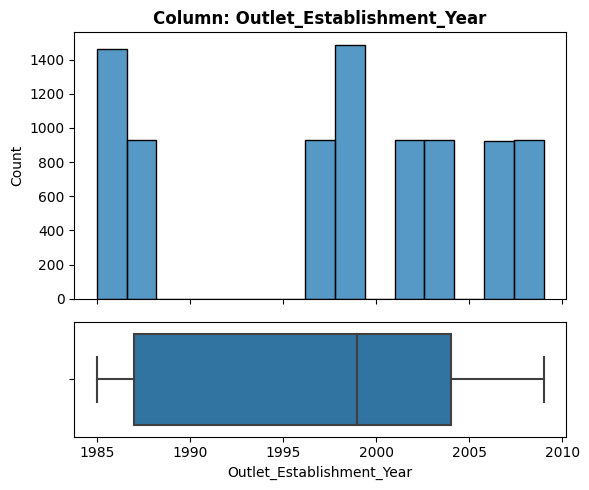

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [62]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -  0 (0.0%)

3. Is the feature constant or quasi-constant?
  - no

4. What is the cardinality? Is it high?
  - Not applicable, numeric.

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - yes because the year won't affect the target



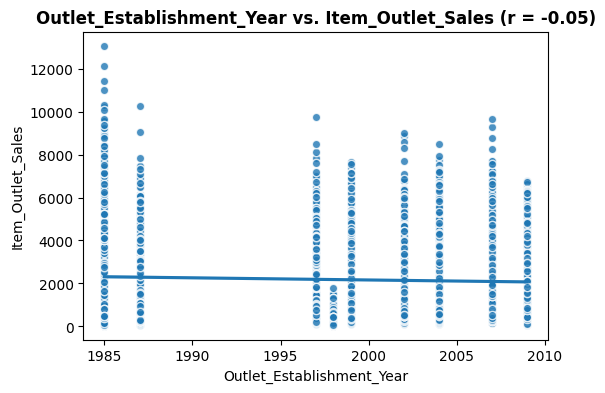

In [63]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `No` because the year won't affect the target
  - Does this feature appear to be a predictor of the target?
    - `No` as we see there is alightly horizontal line

___

### Outlet_Size

- Outlet_Size: The size of the store in terms of ground area covered
  

In [64]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Size"
df[feature].dtype


dtype('O')

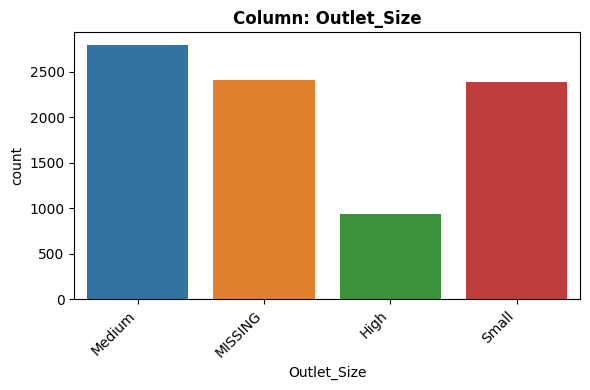

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [65]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 (28.28%), impute them with Missing

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - 4 not high

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



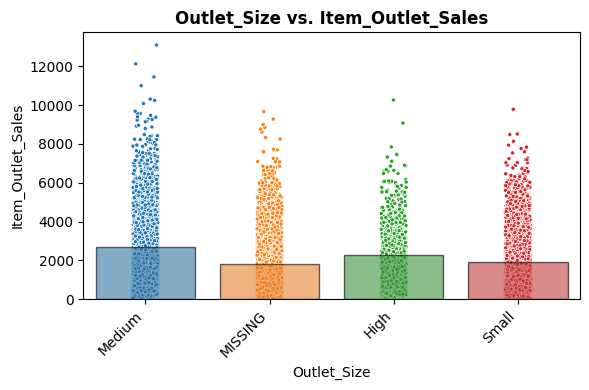

In [67]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `yes`?
  - Does this feature appear to be a predictor of the target?
    - `Yes` there is variety in the plots

___

### Outlet_Location_Type

- Outlet_Location_Type: The type of area in which the store is located

  

In [68]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Location_Type"
df[feature].dtype


dtype('O')

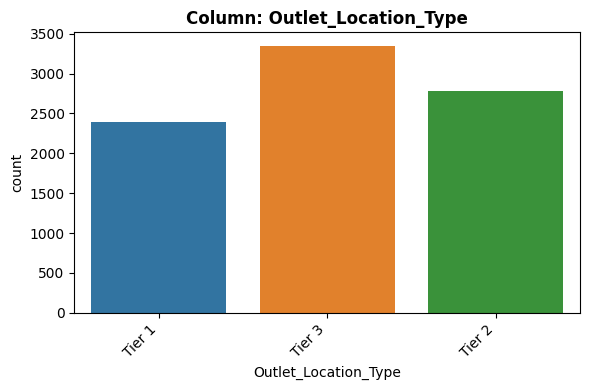

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [69]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0.0%)

3. Is the feature constant or quasi-constant?
  - no

4. What is the cardinality? Is it high?
  - 3 not high

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no



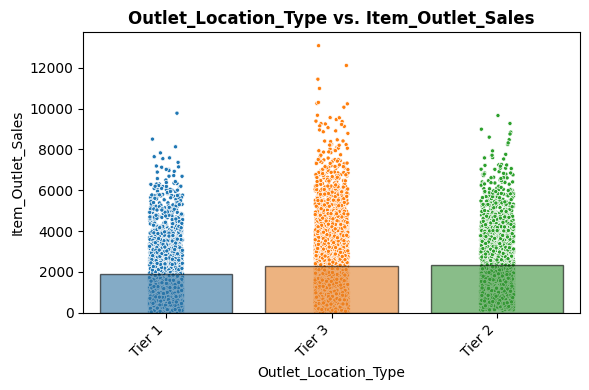

In [71]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `Yes` location can be a predictor
  - Does this feature appear to be a predictor of the target?
    - `yes` ?

___

### Outlet_Type

- Outlet_Type: Whether the outlet is a grocery store or some sort of supermarket


In [72]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Type"
df[feature].dtype


dtype('O')

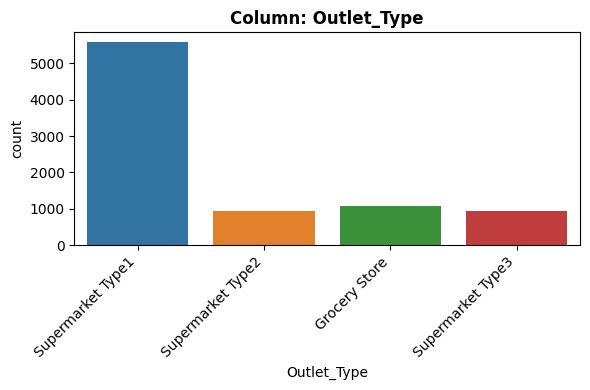

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [73]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  -  0 (0.0%)

3. Is the feature constant or quasi-constant?
  - no

4. What is the cardinality? Is it high?
  - 4 < 10 not high

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no



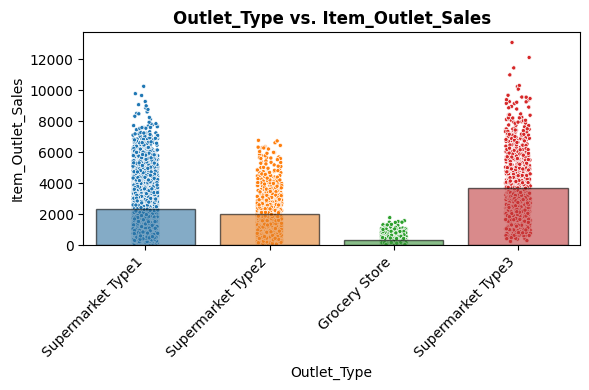

In [74]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `yes` the type of the item can be predictor of the target
  - Does this feature appear to be a predictor of the target?
    - `yes` there is variety in the plots

___

### Item_Outlet_Sales	(Target)

- Item_Outlet_Sales: Sales of the product in the particular store. This is the target variable to be predicted.


In [75]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Outlet_Sales"
df[feature].dtype


dtype('float64')

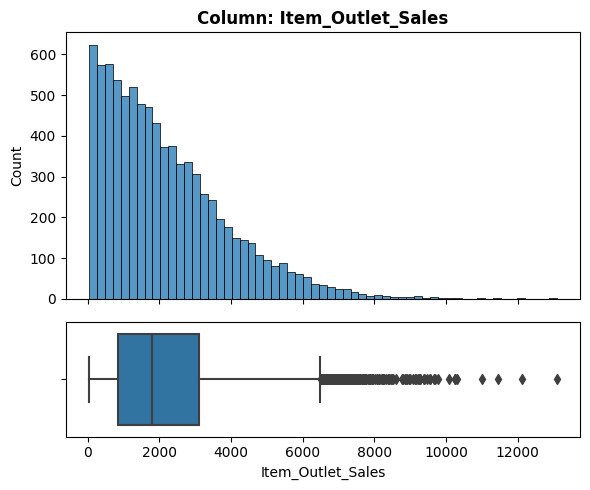

- NaN's Found: 0 (0.0%)
- Unique Values: 3493
- Most common value: '958.752' occurs 17 times (0.2%)
- Not constant or quasi-constant.


In [76]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric. our target!

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0.0%)

3. Is the feature constant or quasi-constant?
  - Not a feature!

4. What is the cardinality? Is it high?
  - N/A - numeric.

5. Would we know this BEFORE the target is determined?
  - yes it is our target

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes, its our target!

